In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# ARIMA (시계열 예측)
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# 시간 측정을 위한 시간 모듈
import datetime
# 주식 정보를 읽어오기 위한 라이브러리
from pandas_datareader import data

# 형태소 백터를 생성하기 위한 라이브러리
from sklearn.feature_extraction.text import CountVectorizer
# 형태소 백터를 학습 백터로 변환한다.
from sklearn.feature_extraction.text import TfidfTransformer

# 데이터 수집
import requests
from bs4 import BeautifulSoup
import re
import time
import os
import json

# 한국어 형태소 분석
from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran

# 워드 클라우드를 위한 라이브러리
from collections import Counter
import pytagcloud
from IPython.display import Image

# 저장
import pickle

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


### 데이터 불러오기

In [2]:
df = pd.read_csv('data/used_mobile_phone.csv')
df

,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59
...,...,...,...,...,...,...,...
4946,2016-10-10 11 29 00 AM,1300000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉\t ...,iphone 7 plus 256gb,1283700,apple,103.05
4947,2016-10-24 10 03 00 PM,1300000.0,미국판 아이폰7 256g 제트블랙 강남역삼 2대 미개봉언락 애플 a1660 강남역삼...,iphone 7 256gb,1130800,apple,103.05
4948,2016-09-19 10 15 00 AM,1300000.0,"아이폰7 미개봉 홍콩판 팝니다 케이스,강화유리서비스 종류다양 아이폰7 917,91...",iphone 7 256gb,1130800,apple,103.05
4949,2016-10-05 12 22 00 AM,1350000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉 미개...,iphone 7 plus 256gb,1283700,apple,103.05


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   create_date    4951 non-null   object 
 1   price          4951 non-null   float64
 2   text           4951 non-null   object 
 3   phone_model    4951 non-null   object 
 4   factory_price  4951 non-null   int64  
 5   maker          4951 non-null   object 
 6   price_index    4951 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 270.9+ KB


In [4]:
df.isna().sum()

create_date      0
price            0
text             0
phone_model      0
factory_price    0
maker            0
price_index      0
dtype: int64

### create_date 특성 확인

In [5]:
df['create_date']

0        2017-03-19  4 35 00 PM
1       2016-10-26  12 08 00 PM
2       2016-10-25  12 52 00 PM
3       2017-03-23  11 14 00 PM
4        2016-04-11  7 35 00 PM
                 ...           
4946    2016-10-10  11 29 00 AM
4947    2016-10-24  10 03 00 PM
4948    2016-09-19  10 15 00 AM
4949    2016-10-05  12 22 00 AM
4950    2016-09-26  11 37 00 AM
Name: create_date, Length: 4951, dtype: object

In [6]:
# 월까지만 가져온다.
df['month'] = df['create_date'].apply(lambda x : x[:7])
df['month'].value_counts()

2016-10    2956
2017-03    1311
2016-08     107
2016-09     105
2016-04     102
2016-05      89
2016-06      76
2016-07      74
2016-03      70
2016-02      61
Name: month, dtype: int64

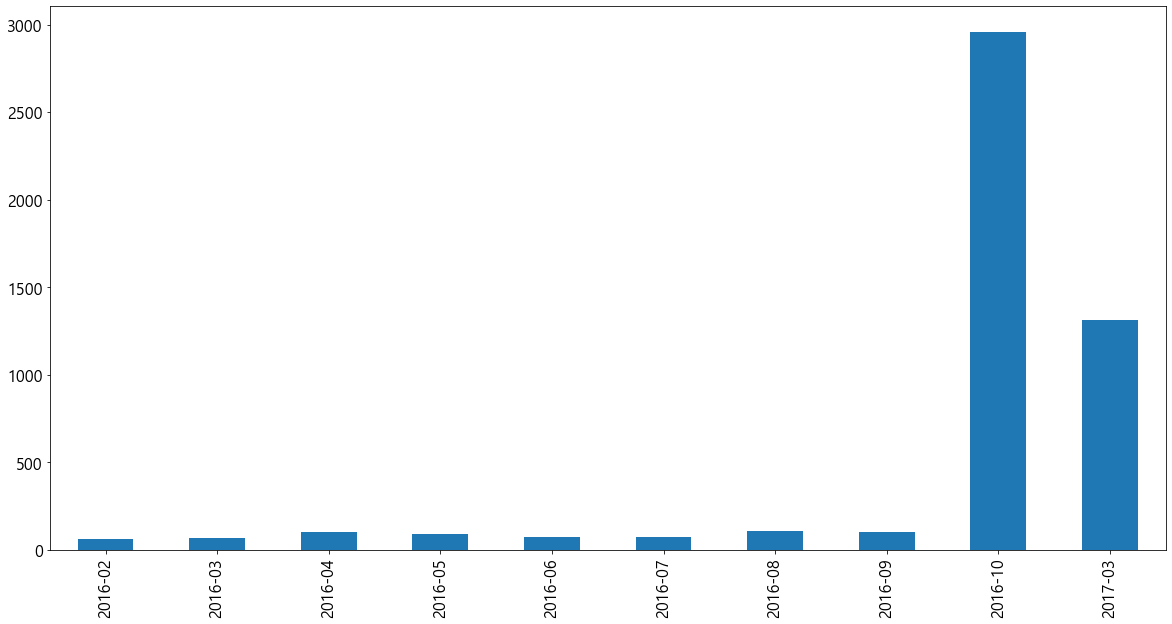

In [7]:
# 월별 거래량을 시각화한다.
a1 = df['month'].value_counts()
a1.sort_index(inplace=True)
a1.plot.bar()
plt.show()

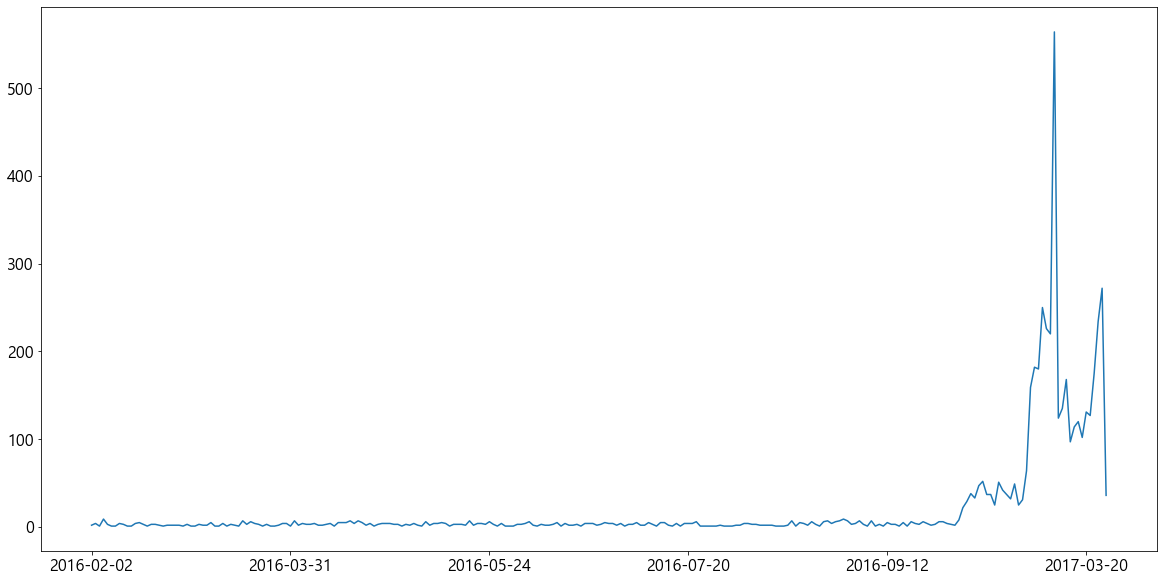

In [8]:
# 일별 거래 횟수를 시각화한다.
df_day = df['create_date'].apply(lambda x : x[:10])
a1 = df_day.value_counts()
a1.sort_index(inplace=True)
a1.plot()
plt.show()

### 가격 분포

In [9]:
# 가격을 확인한다.
df['price'].value_counts()

300000.0     192
400000.0     190
350000.0     186
100000.0     179
450000.0     171
            ... 
1250000.0      1
423000.0       1
74000.0        1
123123.0       1
32000.0        1
Name: price, Length: 169, dtype: int64

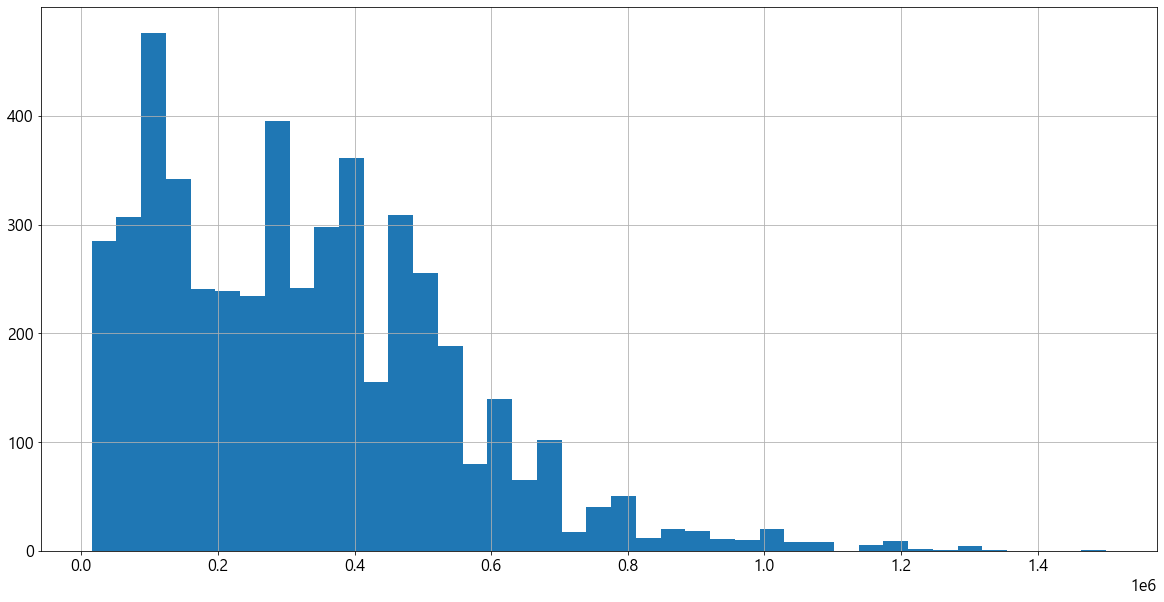

In [10]:
# 가격 분포를 확인한다.
df['price'].hist(bins='auto')
plt.show()

In [11]:
# 핸드폰 기종(phone_model)별 가격의 평균과 표준 편차를 살펴본다.
a1 = df.groupby('phone_model')['price']

df_price_model_mean = a1.apply(lambda x : np.mean(x))
df_price_model_std = a1.apply(lambda x : np.std(x))

In [12]:
# for name in df_price_model_mean.index :
#    print(f'{name} : {df_price_model_mean[name]}')

In [13]:
# for name in df_price_model_std.index :
#     print(f'{name} : {df_price_model_std[name]}')

### 출고가 

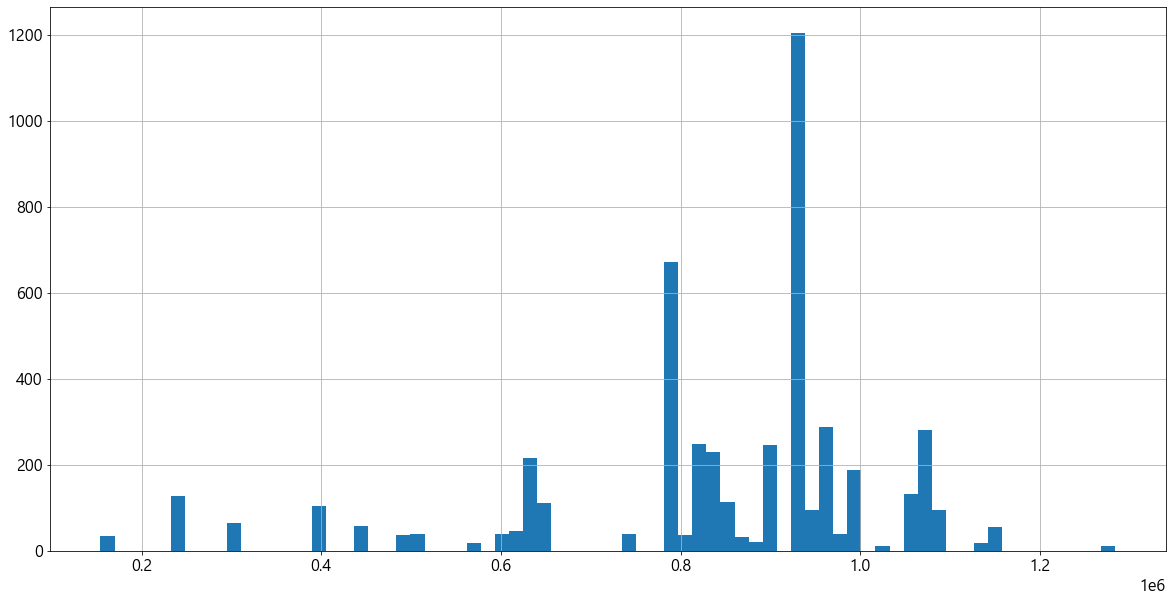

In [14]:
# 출고가의 분포를 확인한다.
df['factory_price'].hist(bins='auto')
plt.show()

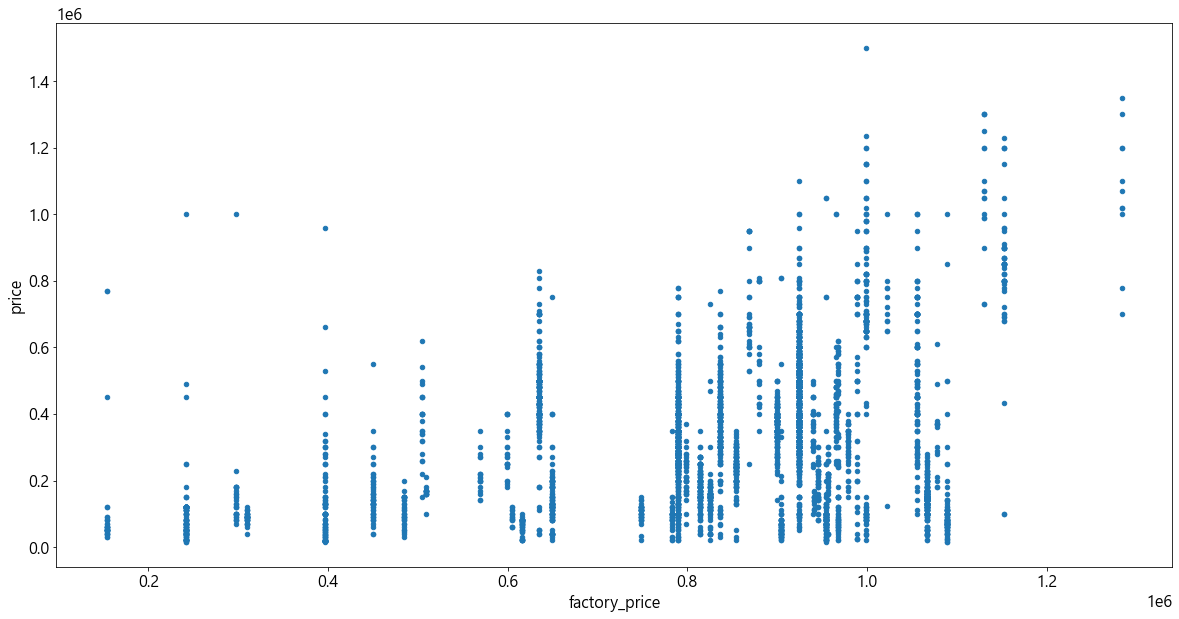

In [15]:
# 출고가와 중고가를 이용해 산점도를 그려본다.
df.plot.scatter(x='factory_price', y='price')
plt.show()

### 핸드폰 모델

In [16]:
# 기종별 데이터의  개수를 집계한다.
model_counts = df['phone_model'].value_counts()
model_counts

iphone 6 64gb          1002
iphone 6 16gb           591
galaxy note3 32gb       231
iphone se 64gb          216
galaxy note5 32gb       167
                       ... 
iphone 6s Plus 16gb      12
iphone 7 plus 32gb       12
iphone 7 plus 256gb      11
iphone 4s 16gb           11
iphone 6 32gb            10
Name: phone_model, Length: 64, dtype: int64

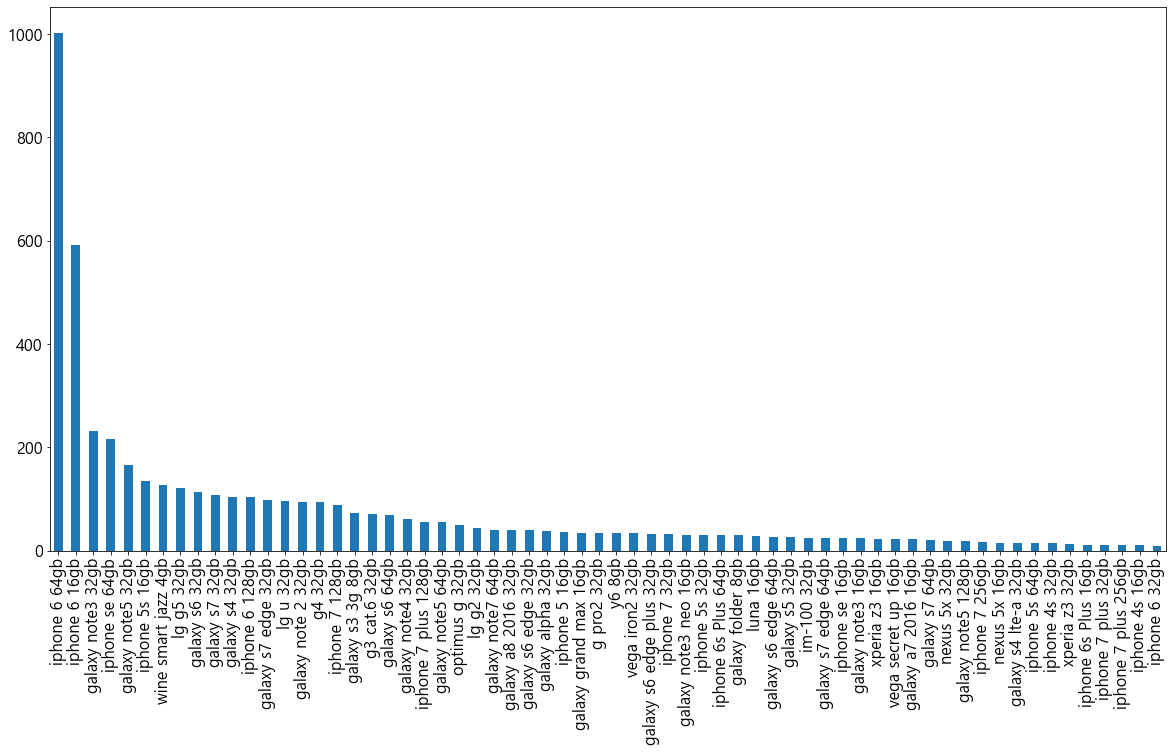

In [17]:
model_counts.plot.bar()
plt.show()

### 제조사

In [18]:
maker_counts = df['maker'].value_counts()
maker_counts

apple      2450
samsung    1642
lg          677
pantech      57
sony         37
huawei       35
tg           28
sky          25
Name: maker, dtype: int64

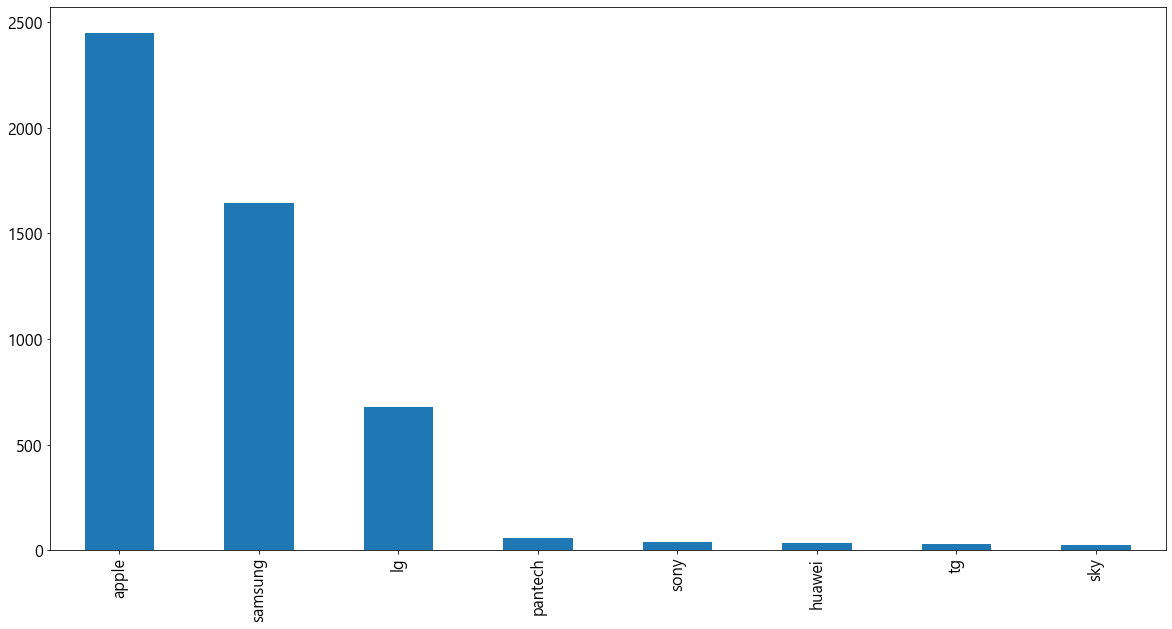

In [19]:
maker_counts.plot.bar()
plt.show()

### 물가

In [20]:
temp = df['price_index'].value_counts()
temp

103.05    3061
95.96     1311
102.59     448
94.90      131
Name: price_index, dtype: int64

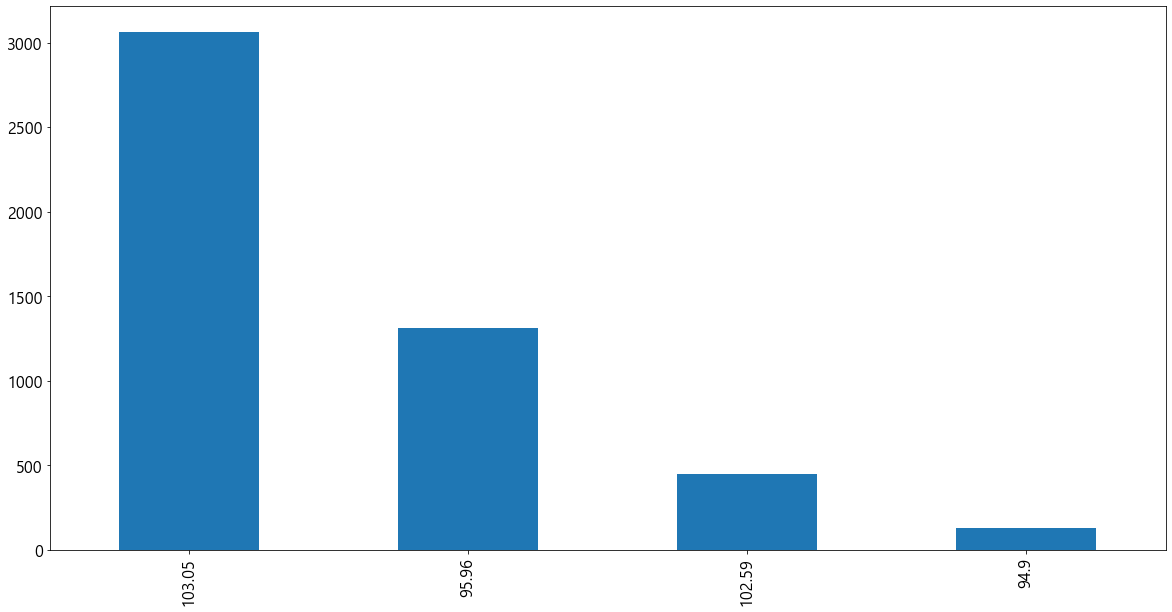

In [21]:
temp.plot.bar()
plt.show()

### 가격 예측 - 회귀분석

In [22]:
# 데이터 준비
df = df[['price', 'phone_model', 'factory_price', 'maker', 'price_index', 
         'month']]
df

,price,phone_model,factory_price,maker,price_index,month
0,550000.0,iphone 6 64gb,924000,apple,95.96,2017-03
1,380000.0,galaxy s6 edge 32gb,979000,samsung,103.05,2016-10
2,300000.0,galaxy s6 32gb,854000,samsung,103.05,2016-10
3,290000.0,lg g5 32gb,836000,lg,95.96,2017-03
4,280000.0,lg u 32gb,396000,lg,102.59,2016-04
...,...,...,...,...,...,...
4946,1300000.0,iphone 7 plus 256gb,1283700,apple,103.05,2016-10
4947,1300000.0,iphone 7 256gb,1130800,apple,103.05,2016-10
4948,1300000.0,iphone 7 256gb,1130800,apple,103.05,2016-09
4949,1350000.0,iphone 7 plus 256gb,1283700,apple,103.05,2016-10


In [23]:
# 인코딩
encoder1 = LabelEncoder()
encoder1.fit(df['phone_model'])
df['phone_model'] = encoder1.transform(df['phone_model'])

encoder2 = LabelEncoder()
encoder2.fit(df['maker'])
df['maker'] = encoder2.transform(df['maker'])

encoder3 = LabelEncoder()
encoder3.fit(df['month'])
df['month'] = encoder3.transform(df['month'])

df

,price,phone_model,factory_price,maker,price_index,month
0,550000.0,40,924000,0,95.96,9
1,380000.0,23,979000,4,103.05,8
2,300000.0,21,854000,4,103.05,8
3,290000.0,52,836000,2,95.96,9
4,280000.0,53,396000,2,102.59,2
...,...,...,...,...,...,...
4946,1300000.0,47,1283700,0,103.05,8
4947,1300000.0,44,1130800,0,103.05,8
4948,1300000.0,44,1130800,0,103.05,7
4949,1350000.0,47,1283700,0,103.05,8


In [24]:
# 입력과 결과로 나눈다.
X = df.drop('price', axis=1)
y = df['price']
display(X)
display(y)

,phone_model,factory_price,maker,price_index,month
0,40,924000,0,95.96,9
1,23,979000,4,103.05,8
2,21,854000,4,103.05,8
3,52,836000,2,95.96,9
4,53,396000,2,102.59,2
...,...,...,...,...,...
4946,47,1283700,0,103.05,8
4947,44,1130800,0,103.05,8
4948,44,1130800,0,103.05,7
4949,47,1283700,0,103.05,8


0        550000.0
1        380000.0
2        300000.0
3        290000.0
4        280000.0
          ...    
4946    1300000.0
4947    1300000.0
4948    1300000.0
4949    1350000.0
4950    1500000.0
Name: price, Length: 4951, dtype: float64

In [25]:
# 표준화
scaler1 = StandardScaler()
scaler1.fit(X)
X = scaler1.transform(X)
X

array([[ 0.46346582,  0.44267769, -0.9270284 , -1.52702709,  0.72225272],
       [-0.59692311,  0.71882252,  1.19024417,  0.65781394,  0.17380591],
       [-0.72167475,  0.09122063,  1.19024417,  0.65781394,  0.17380591],
       ...,
       [ 0.7129691 ,  1.48098225, -0.9270284 ,  0.65781394, -0.3746409 ],
       [ 0.90009655,  2.24866487, -0.9270284 ,  0.65781394,  0.17380591],
       [ 0.65059328,  0.81923882, -0.9270284 ,  0.65781394, -0.3746409 ]])

In [26]:
# 최적의 모델을 추출하고 전체 데이터를 학습한다.
best_model = GradientBoostingRegressor(max_depth=4, learning_rate=0.1, n_estimators=100)
best_model.fit(X, y)

GradientBoostingRegressor(max_depth=4)

In [27]:
# 학습용 데이터를 통해 예측한다.
y_pred = best_model.predict(X)
y_pred

array([ 382687.15109699,  299217.50662132,  248659.99311702, ...,
       1170889.49326423, 1221485.24440872, 1021120.930285  ])

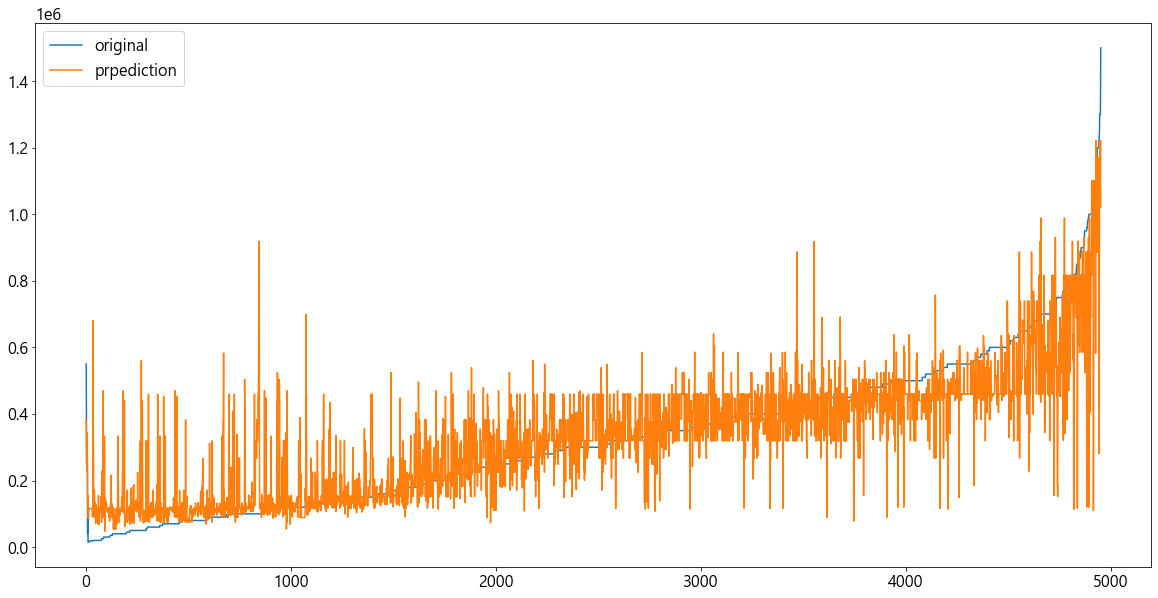

In [28]:
plt.plot(y, label='original')
plt.plot(y_pred, label='prpediction')
plt.legend()
plt.show()

# 감성분석을 이용한 휴대폰 가격 에측

### 데이터 읽어오기

In [29]:
df = pd.read_csv('data/used_mobile_phone.csv')
df

,create_date,price,text,phone_model,factory_price,maker,price_index
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59
...,...,...,...,...,...,...,...
4946,2016-10-10 11 29 00 AM,1300000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉\t ...,iphone 7 plus 256gb,1283700,apple,103.05
4947,2016-10-24 10 03 00 PM,1300000.0,미국판 아이폰7 256g 제트블랙 강남역삼 2대 미개봉언락 애플 a1660 강남역삼...,iphone 7 256gb,1130800,apple,103.05
4948,2016-09-19 10 15 00 AM,1300000.0,"아이폰7 미개봉 홍콩판 팝니다 케이스,강화유리서비스 종류다양 아이폰7 917,91...",iphone 7 256gb,1130800,apple,103.05
4949,2016-10-05 12 22 00 AM,1350000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉 미개...,iphone 7 plus 256gb,1283700,apple,103.05


### 전처리

In [30]:
# create_date 를 수치적으로 환산하기 위해 unixtime 으로 변환한다.
def date_to_unixtime(date_str) :
    # 날짜 값으로 변환한다.
    a1 = datetime.datetime.strptime(date_str, '%Y-%m-%d').timetuple()
    # ms 타임형태로 변경한다.
    timestamp = time.mktime(a1)
    
    return timestamp

In [31]:
# 시간값을 모두 unixtime으로 변경한다.
df['create_unixtime'] = df['create_date'].apply(lambda x : date_to_unixtime(x[:10]))
df

,create_date,price,text,phone_model,factory_price,maker,price_index,create_unixtime
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,1.489849e+09
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,1.477408e+09
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,1.477321e+09
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96,1.490195e+09
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59,1.460300e+09
...,...,...,...,...,...,...,...,...
4946,2016-10-10 11 29 00 AM,1300000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉\t ...,iphone 7 plus 256gb,1283700,apple,103.05,1.476025e+09
4947,2016-10-24 10 03 00 PM,1300000.0,미국판 아이폰7 256g 제트블랙 강남역삼 2대 미개봉언락 애플 a1660 강남역삼...,iphone 7 256gb,1130800,apple,103.05,1.477235e+09
4948,2016-09-19 10 15 00 AM,1300000.0,"아이폰7 미개봉 홍콩판 팝니다 케이스,강화유리서비스 종류다양 아이폰7 917,91...",iphone 7 256gb,1130800,apple,103.05,1.474211e+09
4949,2016-10-05 12 22 00 AM,1350000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉 미개...,iphone 7 plus 256gb,1283700,apple,103.05,1.475593e+09


In [32]:
# 단말기 모델 
df['phone_model'].value_counts()

iphone 6 64gb          1002
iphone 6 16gb           591
galaxy note3 32gb       231
iphone se 64gb          216
galaxy note5 32gb       167
                       ... 
iphone 6s Plus 16gb      12
iphone 7 plus 32gb       12
iphone 7 plus 256gb      11
iphone 4s 16gb           11
iphone 6 32gb            10
Name: phone_model, Length: 64, dtype: int64

In [33]:
# 띄어쓰기를 기준으로 잘라내어 제일 마지막 것이 용량에 해당한다.
a1 = df['phone_model'].apply(lambda x : x.split(' ')[-1])
df['phone_model_storage'] = a1
df

,create_date,price,text,phone_model,factory_price,maker,price_index,create_unixtime,phone_model_storage
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,1.489849e+09,64gb
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,1.477408e+09,32gb
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,1.477321e+09,32gb
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96,1.490195e+09,32gb
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59,1.460300e+09,32gb
...,...,...,...,...,...,...,...,...,...
4946,2016-10-10 11 29 00 AM,1300000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉\t ...,iphone 7 plus 256gb,1283700,apple,103.05,1.476025e+09,256gb
4947,2016-10-24 10 03 00 PM,1300000.0,미국판 아이폰7 256g 제트블랙 강남역삼 2대 미개봉언락 애플 a1660 강남역삼...,iphone 7 256gb,1130800,apple,103.05,1.477235e+09,256gb
4948,2016-09-19 10 15 00 AM,1300000.0,"아이폰7 미개봉 홍콩판 팝니다 케이스,강화유리서비스 종류다양 아이폰7 917,91...",iphone 7 256gb,1130800,apple,103.05,1.474211e+09,256gb
4949,2016-10-05 12 22 00 AM,1350000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉 미개...,iphone 7 plus 256gb,1283700,apple,103.05,1.475593e+09,256gb


In [34]:
# 띄어쓰기를 기준으로 제일 마지막 용량 부분을 제외한 나머지를 가져온다.
# x.split(' ') : 띄어 쓰기를 기준으로 잘래내어 리스트로 번환한다.
# x.split(' ')[:-1] : 처음부터 -1-1 위치까지 만 가져온다.
# ' '.join(...) : 가져온 리스트내의 문자열을 ' ' 를 기준으로 합쳐준다.
a1 = df['phone_model'].apply(lambda x : ' '.join(x.split(' ')[:-1]))
df['phone_model_detail'] = a1
df

,create_date,price,text,phone_model,factory_price,maker,price_index,create_unixtime,phone_model_storage,phone_model_detail
0,2017-03-19 4 35 00 PM,550000.0,아이폰6플러스 블랙+애플라이트 64기가 팝니다 아이폰6플러스 블랙+애플라이트 64...,iphone 6 64gb,924000,apple,95.96,1.489849e+09,64gb,iphone 6
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s6엣지 32기가 팝니다 직거래 갤럭시s6엣지 32기가 품명 갤럭시s6엣지제...,galaxy s6 edge 32gb,979000,samsung,103.05,1.477408e+09,32gb,galaxy s6 edge
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s6 풀박스로 팝니다~~~ 새상품급 실기스조차 없어요 직접거래 구매한지 1...,galaxy s6 32gb,854000,samsung,103.05,1.477321e+09,32gb,galaxy s6
3,2017-03-23 11 14 00 PM,290000.0,sk g5 티탄 폰 단품판매합니다 직접거래 sk g5 티탄 폰 단품판매합니다 올...,lg g5 32gb,836000,lg,95.96,1.490195e+09,32gb,lg g5
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c5 ultra e5506 16gb 미사용 새제품 팝니다 1...,lg u 32gb,396000,lg,102.59,1.460300e+09,32gb,lg u
...,...,...,...,...,...,...,...,...,...,...
4946,2016-10-10 11 29 00 AM,1300000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉\t ...,iphone 7 plus 256gb,1283700,apple,103.05,1.476025e+09,256gb,iphone 7 plus
4947,2016-10-24 10 03 00 PM,1300000.0,미국판 아이폰7 256g 제트블랙 강남역삼 2대 미개봉언락 애플 a1660 강남역삼...,iphone 7 256gb,1130800,apple,103.05,1.477235e+09,256gb,iphone 7
4948,2016-09-19 10 15 00 AM,1300000.0,"아이폰7 미개봉 홍콩판 팝니다 케이스,강화유리서비스 종류다양 아이폰7 917,91...",iphone 7 256gb,1130800,apple,103.05,1.474211e+09,256gb,iphone 7
4949,2016-10-05 12 22 00 AM,1350000.0,미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus 강북 도봉 미개...,iphone 7 plus 256gb,1283700,apple,103.05,1.475593e+09,256gb,iphone 7 plus


### 감성분석으로 물품의 상태 분류하기

In [35]:
# 단말기 별 5% 위치와 95% 위치값을 가져온다.
a1 = df.groupby('phone_model_detail')['price']

# 같은 단말기 내에서 하위 5% 위치의 값을 각각 넣어준다.
df['price_lower'] = a1.transform(lambda x : x.quantile(0.05))
# 같은 단말기 내에서 상위 95% 위치의 값을 각각 넣어준다.
df['price_upper'] = a1.transform(lambda x : x.quantile(0.95))

In [36]:
# 가격대를 구분할 함수
def get_price_level(price, lower, upper) :
    # 단말기 가격이 최소값 보다 작다면
    if price <= lower :
        return '0'
    # 단말기 가격이 최대값 보다 크다면
    elif price >= upper :
        return '2'
    # 중간 가격대라면
    else :
        return '1'

# 하위 5%, 상위 95% 위치의 가격과 비교하여 가격 레벨을 설정해준다.
df['price_level'] = df.apply(lambda row : get_price_level(row['price'],
                                                          row['price_lower'],
                                                          row['price_upper'],
                                                          ), axis=1)
df[['price', 'price_lower', 'price_upper', 'price_level']]

,price,price_lower,price_upper,price_level
0,550000.0,180000.0,680000.0,1
1,380000.0,180000.0,414000.0,1
2,300000.0,150000.0,349000.0,1
3,290000.0,100000.0,500000.0,1
4,280000.0,18000.0,400000.0,1
...,...,...,...,...
4946,1300000.0,628200.0,1200000.0,2
4947,1300000.0,597000.0,1200000.0,2
4948,1300000.0,597000.0,1200000.0,2
4949,1350000.0,628200.0,1200000.0,2


### 텍스트 전처리를 위한 불용어 데이터(stop words)를 불러온다
- stop words : 학습시 노이즈가 되는 단어들을 의미한다(조사, 등등...)
- 이런 단어를 제거하고 나머지만을 가지고 학습을 하면 효과가 좋다.

In [37]:
# 중고나라 불용어 사전을 불러온다.
with open('data/used_mobile_phone_stopwords.pkl', 'rb')as fp :
    stopwords = pickle.load(fp)
    
stopwords

['거래',
 '입니',
 '판매',
 '아이폰',
 '갤럭시',
 '골드',
 '팝',
 '만원',
 '폰',
 '시',
 '주세',
 '노트',
 '문자',
 '화이트',
 '연락',
 '블랙',
 '구매',
 '및',
 '기재',
 '년',
 '품',
 '월',
 '용',
 '로즈',
 '상세',
 '항목',
 '완료',
 '지역',
 '개',
 '실버',
 '신청하기',
 '색상',
 '타',
 '기기',
 '서울',
 '후',
 '문의',
 '원',
 '설명',
 '판',
 '전화',
 '엣지',
 '모두',
 '경우',
 '보시',
 '위',
 '정확히',
 '정도',
 '될',
 '등',
 '휴대폰',
 '되',
 '일',
 '플러스',
 'g',
 'lg',
 'skt',
 'gb',
 'kt',
 'sk',
 'se',
 'lgu',
 'u',
 'lte',
 'fl',
 'ltea',
 'nl',
 'k',
 'z',
 'v',
 'lgt',
 'gs',
 'gl',
 'ss',
 'cat',
 'nk',
 'b',
 'com',
 'gpro',
 'ea',
 'ns',
 'ios',
 'gt',
 'or',
 'usb',
 'amp',
 'umi',
 'lgfl',
 'es',
 'howufeel',
 'gk',
 'ek',
 'xperia',
 'y',
 'wpi',
 'mtk',
 'd',
 'www',
 'sss',
 'fs',
 'el',
 'lglp',
 'white',
 'http',
 'o',
 'l',
 'zv',
 'e',
 'al',
 'gn',
 'ps',
 'naver',
 'rome',
 'gx',
 'lglb',
 'ssanmai',
 'f',
 '계',
 '명',
 '들',
 '적',
 '자',
 '상',
 '화',
 '대',
 '중',
 '장',
 '간',
 '네',
 '분',
 '권',
 '이',
 '백',
 '째',
 '형',
 '분들',
 '번째',
 '씩',
 '쯤',
 '식',
 '조',
 '성',
 '

### 형태소 추출

In [38]:
# + , 를 제외한 모든 특수 문자를 제거한다.
# 숫자 형태의 문자도 제거한다.
def text_cleaning(text) :
    temp_list = []
    
    # 문장의 글자 수 만큼 반복하면서 글자 하나씩 가져온다.
    for a1 in text :
        # 숫자, 알파벳, +, 쉼표, 띄어쓰기라면..
        if a1.isalnum() or a1 in '+, ':
            # 숫자가 아니라면
            if a1.isdigit() == False :
                temp_list.append(a1)
                
    text = ''.join(temp_list)
    return text    

# 문자열을 전처리 한다.
df['text'] = df['text'].apply(lambda x : text_cleaning(x))
df['text']

0       아이폰플러스 블랙+애플라이트 기가 팝니다  아이폰플러스 블랙+애플라이트 기가 팝니다...
1       갤럭시s엣지 기가 팝니다 직거래  갤럭시s엣지 기가 품명 갤럭시s엣지제품 단품상태 ...
2       갤럭시s 풀박스로 팝니다 새상품급  실기스조차 없어요  직접거래 구매한지 개월만에 ...
3       sk  g 티탄 폰 단품판매합니다  직접거래 sk g 티탄 폰 단품판매합니다 올 월...
4        sony 엑스페리아 c ultra e gb  미사용 새제품 팝니다  소니 엑스페리...
                              ...                        
4946    미개봉 언락폰 아이폰플러스 gb 골드 iphone plus 강북 도봉 언락폰 미개봉...
4947    미국판 아이폰 g 제트블랙 강남역삼 대 미개봉언락 애플 a 강남역삼 미국판 아이폰 ...
4948    아이폰 미개봉 홍콩판 팝니다 케이스,강화유리서비스 종류다양 아이폰  , 구매한제품 ...
4949    미개봉 언락폰 아이폰플러스 gb 골드 iphone plus 강북 도봉 미개봉 언락폰...
4950     팝니다  아이폰  gb 제트블랙 북미판  카메라 무음, 국내리퍼 가능  gb je...
Name: text, Length: 4951, dtype: object

In [39]:
# 형태소 추출
def get_pos(x) :
    # 형태소 분리를 위한 객체
    tagger = Okt()
    # 형태소를 분리한다.
    poses = tagger.pos(x)
    # print(poses)
    
    # 불용어에 해당하지 않는 것만 추출한다.
    result_list = []
    
    # 반복하면서 (단어, 품사) 형태의 튜플을 추출한다
    for a1, a2 in poses :
        # 단어가 불용어에 포함되어 있지 않다면..
        if a1 not in stopwords :
            # 결과 리스트에 추가한다.
            result_list.append(a1)
            
    return result_list
    
pos_list = df['text'].apply(lambda x : get_pos(x))
pos_list

0       [+, 애플, 라이트, 팝니다, +, 애플, 라이트, 팝니다, +, 애플, 라이트,...
1       [s, 팝니다, 직거래, s, 품명, s, 제품, 상태, 사진, 참고, 용량, 선택...
2       [s, 풀, 박스, 팝니다, 새, 상품, 급, 실기스, 없어요, 직접, 한지, 개월...
3       [티탄, 합니다, 직접, 티탄, 합니다, 월일, as, 가능하며, 이나, 상태, 좋...
4       [sony, 엑스페리아, c, ultra, 미사, 새, 제품, 팝니다, 소니, 엑스...
                              ...                        
4946    [미개, 봉, 언락폰, iphone, plus, 강북, 도봉, 언락폰, 미개, 봉,...
4947    [미국, 제트, 강남, 역삼, 미, 개봉, 언, 락, 애플, a, 강남, 역삼, 미...
4948    [미개, 봉, 홍콩, 팝니다, 케이스, 강화유리, 서비스, 종류, 다양, 제품, 미...
4949    [미개, 봉, 언락폰, iphone, plus, 강북, 도봉, 미개, 봉, 언락폰,...
4950    [팝니다, 제트, 북미판, 카메라, 무음, 국내, 리퍼, 가능, jet, black...
Name: text, Length: 4951, dtype: object

In [40]:
# 하나의 리스트로 가져온다.
pos_list2 = pos_list.tolist()
# sum(리스트1, 리스트2) : 두 리스트를 합친다.
# 두 번째 넣어준 리스트의 형태로 맞춰서 합쳐진다.
corpus = sum(pos_list2, [])
# corpus

In [41]:
# 단어 : 개수 형태의 사전을 생성한다.
counter = Counter(corpus)
# counter

In [42]:
# 빈도수가 가장 많은 단어 3000개를 추출한다.
a1 = counter.most_common(3000)
# a1

In [43]:
# 단어만 추출해서 담는다.
common_words = []

for key, value in a1 :
    common_words.append(key)

### TF-IDF 벡터 생성

In [44]:
# 전체 문장에서 가장 많이 나온 단어 3000개에 해당하는 것들만 담는다.
def get_common_pos(x) :
    tagger = Okt()
    poses = tagger.pos(x)
    
    pos_list = []
    
    # 형태소 만큼 반복한다.
    for a1, _ in poses :
        # 가장 많이 나온 3000개 단어에 해당한다면 리스트에 담는다.
        if a1 in common_words :
            pos_list.append(a1)
            
    return pos_list

In [45]:
# 단어당 몇개씩 들어 있는지에 대한 벡터를 생성한다.
index_vectorizer = CountVectorizer(tokenizer= lambda x : get_common_pos(x))
X = index_vectorizer.fit_transform(df['text'].tolist())
X

<4951x3000 sparse matrix of type '<class 'numpy.int64'>'
	with 201534 stored elements in Compressed Sparse Row format>

In [46]:
# TF-IDF 벡터를 생성한다.
t_vectorizer = TfidfTransformer()
X = t_vectorizer.fit_transform(X)
X

<4951x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 201534 stored elements in Compressed Sparse Row format>

In [47]:
# 결과 데이터
y = df['price_level']
y

0       1
1       1
2       1
3       1
4       1
       ..
4946    2
4947    2
4948    2
4949    2
4950    2
Name: price_level, Length: 4951, dtype: object

### 교차 검증

In [48]:
# 최적의 모델에 전체 데이터를 학습시킨다.
best_model = SVC(C=10)
best_model.fit(X, y)

SVC(C=10)

In [49]:
test_data = [
    '새로산 폰인데 팝니다',
    '상태 매우 좋은 아이폰 입니다',
    '상태 매우 좋은 갤럭시 입니다',
    '아이폰인데 액정이 깨졌어요',
    '갤럭시인데 액정이 깨졌어요',
    '미개봉 언락폰 아이폰7플러스 256gb 골드 iphone7 plus',
    '갤럭시 s6 풀박스로 팝니다',
    '미개봉'
]

# 학습때와 동일한 과정으로 전처리를 한다.
X = index_vectorizer.transform(test_data)
X = t_vectorizer.transform(X)

# 예측한다.
y_pred = best_model.predict(X)
y_pred

array(['1', '1', '1', '1', '1', '1', '1', '2'], dtype=object)

### 중고폰 가격 예측

In [50]:
# text 특성으로 부터 상품 상태 특성을 생성한다.
X = index_vectorizer.transform(df['text'].tolist())
X = t_vectorizer.transform(X)

# 예측 결과를 가져온다.
y_pred = best_model.predict(X)

df['product_status'] = pd.Series(y_pred)
df


,create_date,price,text,phone_model,factory_price,maker,price_index,create_unixtime,phone_model_storage,phone_model_detail,price_lower,price_upper,price_level,product_status
0,2017-03-19 4 35 00 PM,550000.0,아이폰플러스 블랙+애플라이트 기가 팝니다 아이폰플러스 블랙+애플라이트 기가 팝니다...,iphone 6 64gb,924000,apple,95.96,1.489849e+09,64gb,iphone 6,180000.0,680000.0,1,1
1,2016-10-26 12 08 00 PM,380000.0,갤럭시s엣지 기가 팝니다 직거래 갤럭시s엣지 기가 품명 갤럭시s엣지제품 단품상태 ...,galaxy s6 edge 32gb,979000,samsung,103.05,1.477408e+09,32gb,galaxy s6 edge,180000.0,414000.0,1,1
2,2016-10-25 12 52 00 PM,300000.0,갤럭시s 풀박스로 팝니다 새상품급 실기스조차 없어요 직접거래 구매한지 개월만에 ...,galaxy s6 32gb,854000,samsung,103.05,1.477321e+09,32gb,galaxy s6,150000.0,349000.0,1,1
3,2017-03-23 11 14 00 PM,290000.0,sk g 티탄 폰 단품판매합니다 직접거래 sk g 티탄 폰 단품판매합니다 올 월...,lg g5 32gb,836000,lg,95.96,1.490195e+09,32gb,lg g5,100000.0,500000.0,1,1
4,2016-04-11 7 35 00 PM,280000.0,sony 엑스페리아 c ultra e gb 미사용 새제품 팝니다 소니 엑스페리...,lg u 32gb,396000,lg,102.59,1.460300e+09,32gb,lg u,18000.0,400000.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4946,2016-10-10 11 29 00 AM,1300000.0,미개봉 언락폰 아이폰플러스 gb 골드 iphone plus 강북 도봉 언락폰 미개봉...,iphone 7 plus 256gb,1283700,apple,103.05,1.476025e+09,256gb,iphone 7 plus,628200.0,1200000.0,2,2
4947,2016-10-24 10 03 00 PM,1300000.0,미국판 아이폰 g 제트블랙 강남역삼 대 미개봉언락 애플 a 강남역삼 미국판 아이폰 ...,iphone 7 256gb,1130800,apple,103.05,1.477235e+09,256gb,iphone 7,597000.0,1200000.0,2,2
4948,2016-09-19 10 15 00 AM,1300000.0,"아이폰 미개봉 홍콩판 팝니다 케이스,강화유리서비스 종류다양 아이폰 , 구매한제품 ...",iphone 7 256gb,1130800,apple,103.05,1.474211e+09,256gb,iphone 7,597000.0,1200000.0,2,2
4949,2016-10-05 12 22 00 AM,1350000.0,미개봉 언락폰 아이폰플러스 gb 골드 iphone plus 강북 도봉 미개봉 언락폰...,iphone 7 plus 256gb,1283700,apple,103.05,1.475593e+09,256gb,iphone 7 plus,628200.0,1200000.0,2,2


In [51]:
# 필요한 컬럼만 모아준다.
df = df[['price', 'factory_price', 'maker', 'price_index', 'create_unixtime',
         'phone_model_storage', 'phone_model_detail', 'product_status']]

df


,price,factory_price,maker,price_index,create_unixtime,phone_model_storage,phone_model_detail,product_status
0,550000.0,924000,apple,95.96,1.489849e+09,64gb,iphone 6,1
1,380000.0,979000,samsung,103.05,1.477408e+09,32gb,galaxy s6 edge,1
2,300000.0,854000,samsung,103.05,1.477321e+09,32gb,galaxy s6,1
3,290000.0,836000,lg,95.96,1.490195e+09,32gb,lg g5,1
4,280000.0,396000,lg,102.59,1.460300e+09,32gb,lg u,1
...,...,...,...,...,...,...,...,...
4946,1300000.0,1283700,apple,103.05,1.476025e+09,256gb,iphone 7 plus,2
4947,1300000.0,1130800,apple,103.05,1.477235e+09,256gb,iphone 7,2
4948,1300000.0,1130800,apple,103.05,1.474211e+09,256gb,iphone 7,2
4949,1350000.0,1283700,apple,103.05,1.475593e+09,256gb,iphone 7 plus,2


In [52]:
# 인코딩
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
encoder3 = LabelEncoder()
encoder4 = LabelEncoder()

encoder1.fit(df['maker'])
encoder2.fit(df['phone_model_storage'])
encoder3.fit(df['phone_model_detail'])
encoder4.fit(df['product_status'])

df['maker'] = encoder1.transform(df['maker'])
df['phone_model_storage'] = encoder2.transform(df['phone_model_storage'])
df['phone_model_detail'] = encoder3.transform(df['phone_model_detail'])
df['product_status'] = encoder4.transform(df['product_status'])

df


,price,factory_price,maker,price_index,create_unixtime,phone_model_storage,phone_model_detail,product_status
0,550000.0,924000,0,95.96,1.489849e+09,5,27,1
1,380000.0,979000,4,103.05,1.477408e+09,3,19,1
2,300000.0,854000,4,103.05,1.477321e+09,3,18,1
3,290000.0,836000,2,95.96,1.490195e+09,3,33,1
4,280000.0,396000,2,102.59,1.460300e+09,3,34,1
...,...,...,...,...,...,...,...,...
4946,1300000.0,1283700,0,103.05,1.476025e+09,2,30,2
4947,1300000.0,1130800,0,103.05,1.477235e+09,2,29,2
4948,1300000.0,1130800,0,103.05,1.474211e+09,2,29,2
4949,1350000.0,1283700,0,103.05,1.475593e+09,2,30,2


In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4951 entries, 0 to 4950
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                4951 non-null   float64
 1   factory_price        4951 non-null   int64  
 2   maker                4951 non-null   int32  
 3   price_index          4951 non-null   float64
 4   create_unixtime      4951 non-null   float64
 5   phone_model_storage  4951 non-null   int32  
 6   phone_model_detail   4951 non-null   int32  
 7   product_status       4951 non-null   int32  
dtypes: float64(3), int32(4), int64(1)
memory usage: 232.2 KB


In [54]:
# 입력과 결과로 나눈다.
X = df.drop('price', axis=1)
y = df['price']

display(X)
display(y)


,factory_price,maker,price_index,create_unixtime,phone_model_storage,phone_model_detail,product_status
0,924000,0,95.96,1.489849e+09,5,27,1
1,979000,4,103.05,1.477408e+09,3,19,1
2,854000,4,103.05,1.477321e+09,3,18,1
3,836000,2,95.96,1.490195e+09,3,33,1
4,396000,2,102.59,1.460300e+09,3,34,1
...,...,...,...,...,...,...,...
4946,1283700,0,103.05,1.476025e+09,2,30,2
4947,1130800,0,103.05,1.477235e+09,2,29,2
4948,1130800,0,103.05,1.474211e+09,2,29,2
4949,1283700,0,103.05,1.475593e+09,2,30,2


0        550000.0
1        380000.0
2        300000.0
3        290000.0
4        280000.0
          ...    
4946    1300000.0
4947    1300000.0
4948    1300000.0
4949    1350000.0
4950    1500000.0
Name: price, Length: 4951, dtype: float64

In [55]:
# 표준화
scaler1 = StandardScaler()
scaler1.fit(X)
X = scaler1.transform(X)
X


array([[ 0.44267769, -0.9270284 , -1.52702709, ...,  1.11572406,
         0.42162684,  0.00563549],
       [ 0.71882252,  1.19024417,  0.65781394, ..., -0.08396099,
        -0.404278  ,  0.00563549],
       [ 0.09122063,  1.19024417,  0.65781394, ..., -0.08396099,
        -0.50751611,  0.00563549],
       ...,
       [ 1.48098225, -0.9270284 ,  0.65781394, ..., -0.68380352,
         0.62810305,  2.79576782],
       [ 2.24866487, -0.9270284 ,  0.65781394, ..., -0.68380352,
         0.73134116,  2.79576782],
       [ 0.81923882, -0.9270284 ,  0.65781394, ..., -1.88348857,
         0.62810305,  2.79576782]])

In [56]:
# 학습과 검증으로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [58]:
# learning_rage : 학습률
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
#     'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model1 = GradientBoostingRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf1 = GridSearchCV(model1, param_grid=params, scoring='r2', cv=kfold)
grid_clf1.fit(X_train, y_train)
print(f'최적의 하이퍼 파라미터 : {grid_clf1.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf1.best_score_}')


최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'n_estimators': 300}
최적의 모델 평균성능 : 0.8453836871235421


In [59]:
best_model = grid_clf1.best_estimator_

best_model.fit(X_train, y_train)


GradientBoostingRegressor(n_estimators=300)

In [60]:
# 예측시 사용할 데이터
factory_price = 1_300_000
maker = 'apple'
price_index = 95.96
create_unixtime = 1.489849e+09
phone_model_storage = '128gb'
phone_model_detail = 'iphone 7 plus'


In [61]:
# 예측 결과를 추출한다.
y_pred = best_model.predict(X_test)
y_pred


array([141593.6880916 , 466975.70916701, 389193.78333114, ...,
       335021.07827521, 454477.72730784, 466975.70916701])

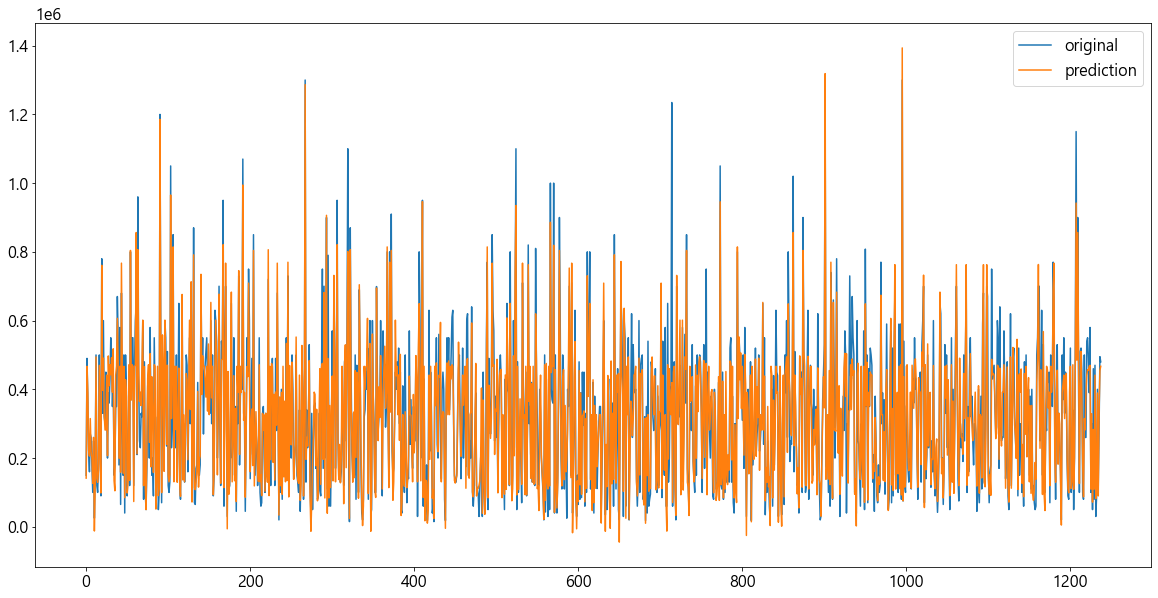

In [62]:
plt.plot(y_test.values, label='original')
plt.plot(y_pred, label='prediction')
plt.legend()
plt.show()


In [63]:
factory_price = 1_300_000
maker = 'apple'
price_index = 95.96
create_unixtime = 1.489849e+09
phone_model_storage = '128gb'
phone_model_detail = 'iphone 7 plus'
text = '아이폰 7 플러스 스페이스 그레이 128기가 미개봉 팝니다'


In [64]:
# 인코딩
maker = encoder1.transform([maker])
phone_model_storage = encoder2.transform([phone_model_storage])
phone_model_detail = encoder3.transform([phone_model_detail])

print(maker)
print(phone_model_storage)
print(phone_model_detail)


[0]
[0]
[30]
